In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [ ]:
###### from mike ############################################################################################
'''
ncfile = nc4.Dataset('filename.nc', mode = 'w', format = "NETCDF4_CLASSIC")
lat_dim = ncfile.createDimension('lat', 361) # latitude axis
lon_dim = ncfile.createDimension('lon', 721) # longitude axis

lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'

z = ncfile.createVariable('z',np.float64,('lat','lon')) # note: unlimited dimension is leftmost
z.units = 'cm' # degrees Kelvin
z.standard_name = 'real component' # this is a CF standard name
z[:,:] = REAL[i].data
ncfile.close()
'''
#############################################################################################################

# HYCOM<sub>CCI</sub> vs HYCOM<sub>FREE</sub> vs CCI SST

In [3]:
ds_free = xr.open_dataset('../Data/hycom_free_sst.nc')
ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_sst.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_sst = xr.open_dataset('../Data/cci_sst.nc')
ds_sst = ds_sst.sel(time=slice('2009-01-01','2014-06-04'))
ds_sst['analysed_sst'] = ds_sst['analysed_sst'] - 273.15

# ds_modis = xr.open_dataset('../Data/modis_aqua_l3_regional.nc')

# diff = ds_cci - ds_free

In [4]:
# testing regridded CCI SSTs

ds_sst = xr.open_dataset('../Data/cci_con_regrid.nc')
ds_sst = ds_sst.sel(time=slice('2009-01-01','2014-06-04'))
ds_sst['analysed_sst'] = ds_sst['analysed_sst'] - 273.15

ds_sst['latitude'] = ds_cci['latitude']
ds_sst['longitude'] = ds_cci['longitude']

In [3]:
# Assigning time variable to MODIS (questionable practice)

# ds_modis['record'] = 'time'
ds_modis = ds_modis.rename({'record': 'time'})
ds_modis['time'] = ds_cci['time']
# ds_modis.to_netcdf()

In [ ]:
ds_modis['sst'].to_netcdf('../Data/modis_aqua_timed.nc', format='NETCDF4', engine='netcdf4')

In [3]:
ds_cci['time']

<xarray.DataArray 'time' (time: 1981)>
array(['2009-01-01T00:00:00.000000000', '2009-01-02T00:00:00.000000000',
       '2009-01-03T00:00:00.000000000', ..., '2014-06-02T00:00:00.000000000',
       '2014-06-03T00:00:00.000000000', '2014-06-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2014-06-04
Attributes:
    long_name:  forecast time

In [ ]:
ds_modis.to_netcdf('../Data/modis_aqua_L3_timed.nc')

In [4]:
ds_cci.to_netcdf('../Data/cci_sst_time.nc')

## Mean Temperature

### HYCOM<sub>FREE</sub>

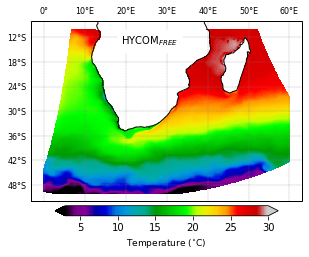

<Figure size 432x288 with 0 Axes>

In [9]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_free['temperature'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_mean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>FREE</sub> seasonal means

In [11]:
# Group data and mean by season

ds_free_seasonal_mean = ds_free['temperature'].groupby('time.season').mean('time')

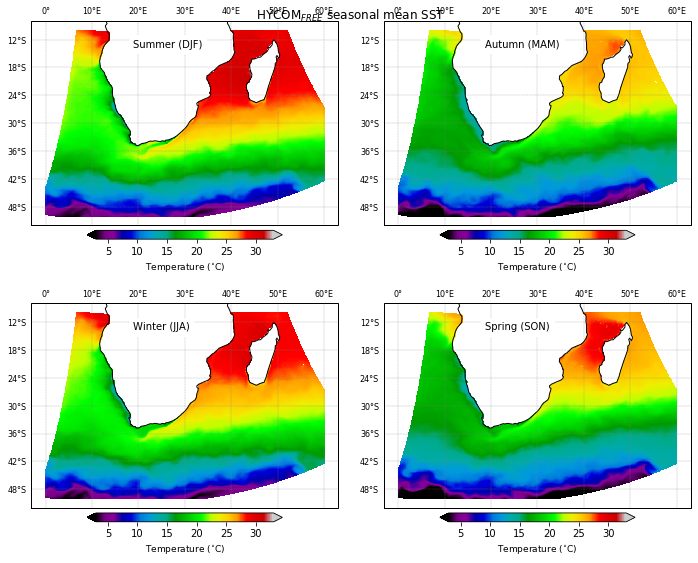

In [29]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ seasonal mean SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_free_seasonal_mean[s,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=33)
    cbar = plt.colorbar(img, shrink=0.6, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmean_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### HYCOM<sub>CCI</sub>

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


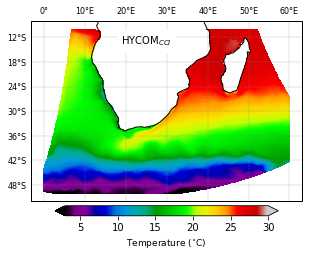

<Figure size 432x288 with 0 Axes>

In [5]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_cci['temperature'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
# plt.savefig('../Figures/sst/SST_mean_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>CCI</sub> seasonal means

In [33]:
# Group data and mean by season

ds_cci_seasonal_mean = ds_cci['temperature'].groupby('time.season').mean('time')

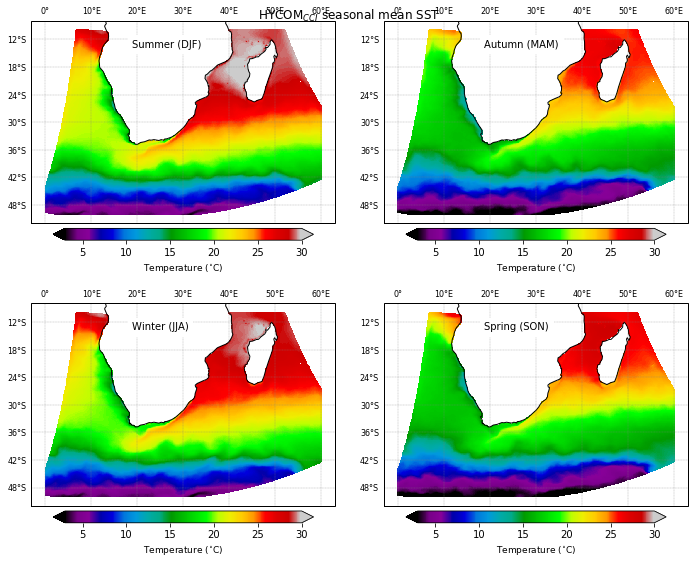

In [36]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ seasonal mean SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_cci_seasonal_mean[s,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmean_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### CCI SST

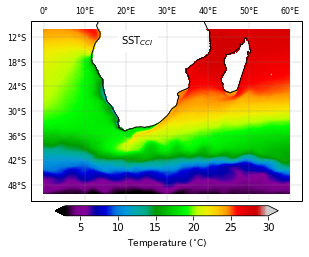

<Figure size 432x288 with 0 Axes>

In [39]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_sst['analysed_sst'].mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_mean_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### CCI SST seasonal means

In [40]:
# Group data and mean by season

ds_sst_seasonal_mean = ds_sst['analysed_sst'].groupby('time.season').mean('time')

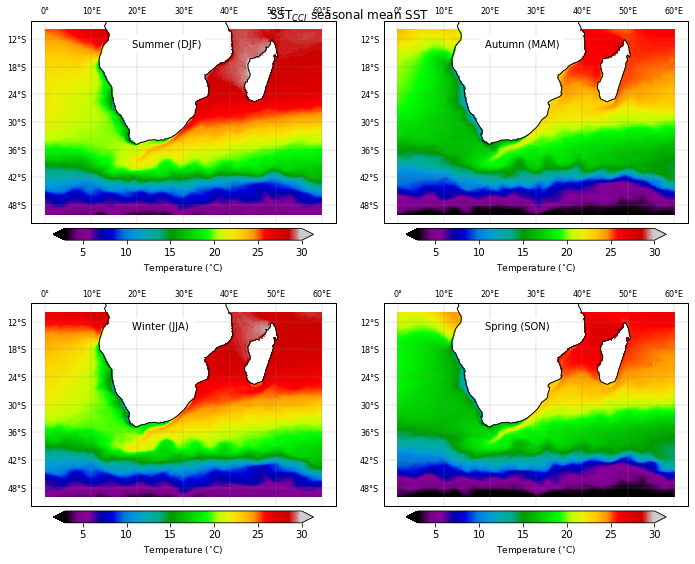

In [42]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('SST$_{CCI}$ seasonal mean SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_sst_seasonal_mean[s,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines(resolution='110m')
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmean_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>) mean SST

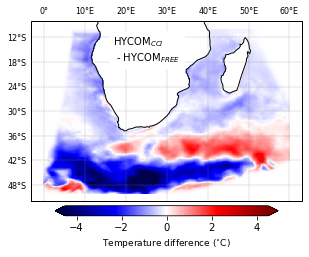

<Figure size 432x288 with 0 Axes>

In [59]:
proj = ccrs.PlateCarree()

diff = ds_cci.temperature.mean('time') - ds_free.temperature.mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_meandiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>) seasonal mean SST

In [83]:
# Group data and mean by season

ds_free_seasonal_mean = ds_free['temperature'].groupby('time.season').mean('time')
ds_cci_seasonal_mean = ds_cci['temperature'].groupby('time.season').mean('time')

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


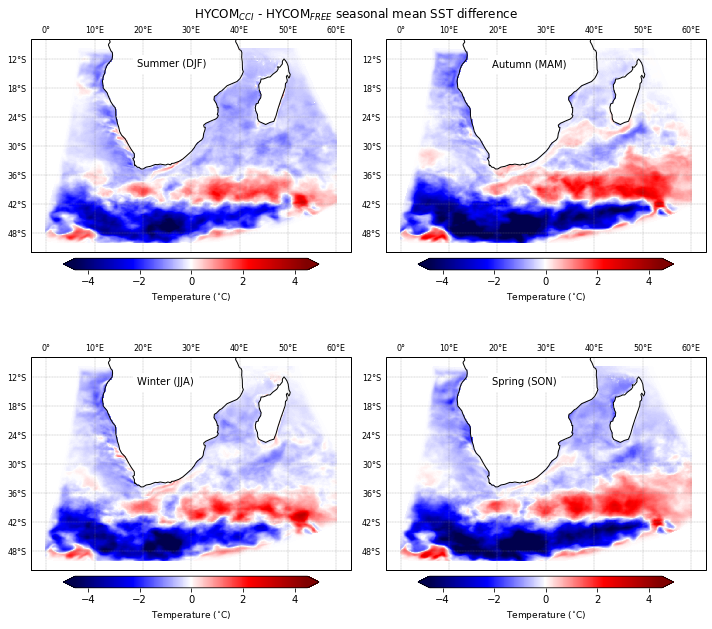

In [62]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,9))
fig.suptitle('HYCOM$_{CCI}$ - HYCOM$_{FREE}$ seasonal mean SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_seasonal_mean[s,0,:,:] - ds_free_seasonal_mean[s,0,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmeandiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>FREE</sub> - CCI SST )

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


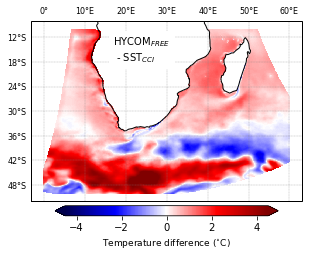

<Figure size 432x288 with 0 Axes>

In [11]:
proj = ccrs.PlateCarree()

diff = ds_free['temperature'].mean('time') - ds_sst['analysed_sst'].mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{FREE}$\n - SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_meandiff_HYCOMfreeSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - SST<sub>CCI</sub>) seasonal stdev SST

In [8]:
# Group data and mean by season

ds_sst_seasonal_mean = ds_sst['analysed_sst'].groupby('time.season').mean('time')
ds_free_seasonal_mean = ds_free['temperature'].groupby('time.season').mean('time')

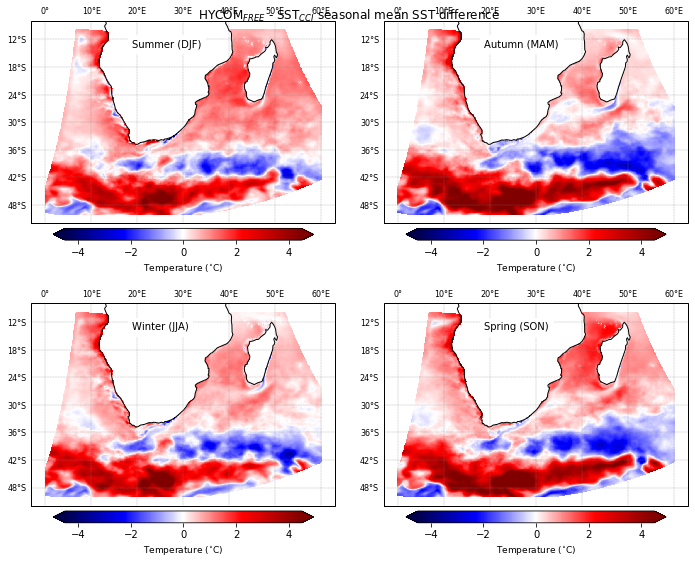

In [12]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ - SST$_{CCI}$ seasonal mean SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_free_seasonal_mean[s,0,:,:] - ds_sst_seasonal_mean[s,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmeandiff_HYCOMfreeSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - CCI SST )

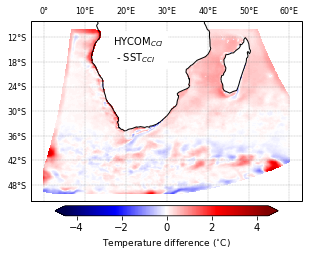

<Figure size 432x288 with 0 Axes>

In [65]:
proj = ccrs.PlateCarree()

diff = ds_cci['temperature'].mean('time') - ds_sst['analysed_sst'].mean('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_meandiff_HYCOMcciSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - SST<sub>CCI</sub>) seasonal stdev SST

In [13]:
# Group data and mean by season

ds_sst_seasonal_mean = ds_sst['analysed_sst'].groupby('time.season').mean('time')
ds_cci_seasonal_mean = ds_cci['temperature'].groupby('time.season').mean('time')

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


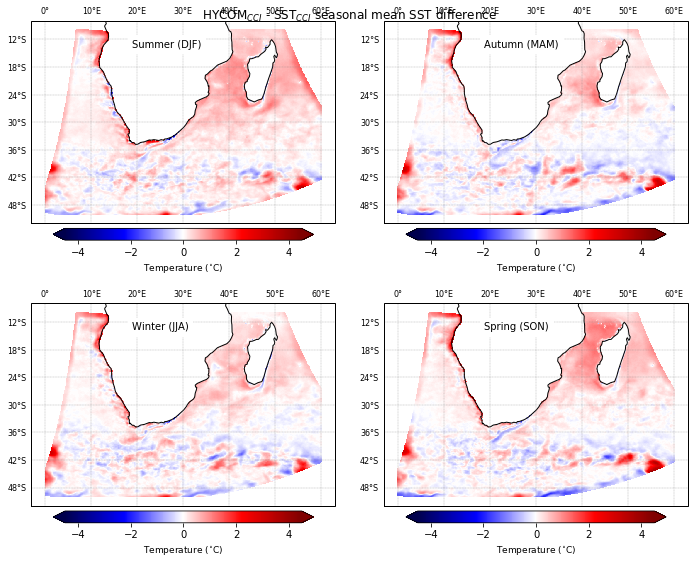

In [15]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ - SST$_{CCI}$ seasonal mean SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_seasonal_mean[s,0,:,:] - ds_sst_seasonal_mean[s,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-4.5, vmax=4.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalmeandiff_HYCOMcciSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## Standard Deviation

### HYCOM<sub>FREE</sub>

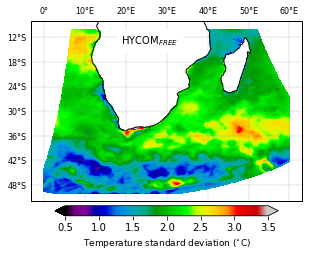

<Figure size 432x288 with 0 Axes>

In [44]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_free['temperature'].std('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature standard deviation ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdev_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>FREE</sub> seasonal standard deviations

In [45]:
# Group data and mean by season

ds_free_seasonal = ds_free['temperature'].groupby('time.season').std('time')

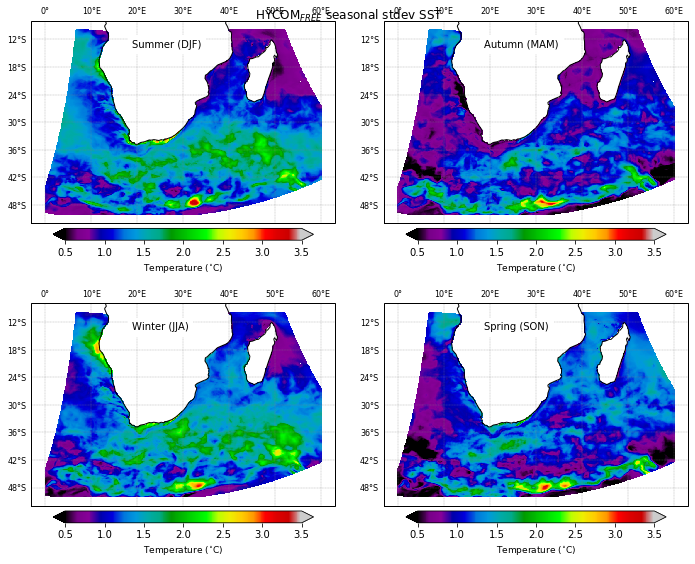

In [47]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ seasonal stdev SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_free_seasonal[s,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdev_HYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### HYCOM<sub>CCI</sub>

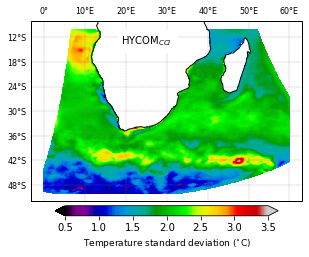

<Figure size 432x288 with 0 Axes>

In [49]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_cci['temperature'].std('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature standard deviation ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'HYCOM$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdev_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### HYCOM<sub>CCI</sub> seasonal standard deviations

In [50]:
# Group data and mean by season

ds_cci_seasonal_stdev = ds_cci['temperature'].groupby('time.season').std('time')

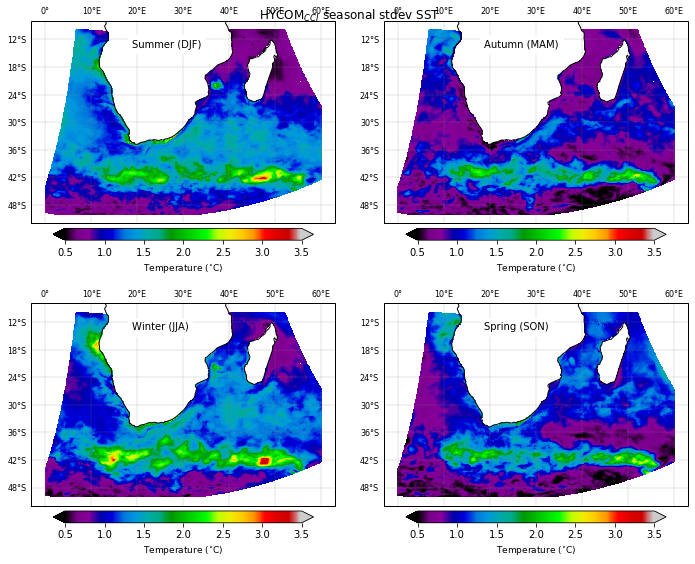

In [51]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ seasonal stdev SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_cci_seasonal_stdev[s,0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdev_HYCOMcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### CCI SST

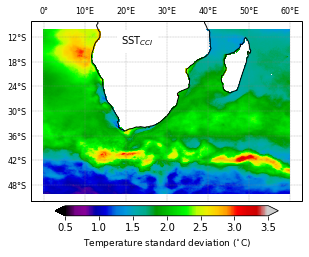

<Figure size 432x288 with 0 Axes>

In [52]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = ds_sst['analysed_sst'].std('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature standard deviation ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.87,'SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdev_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### CCI SST seasonal standard deviations

In [54]:
# Group data and mean by season

ds_sst_seasonal_stdev = ds_sst['analysed_sst'].groupby('time.season').std('time')

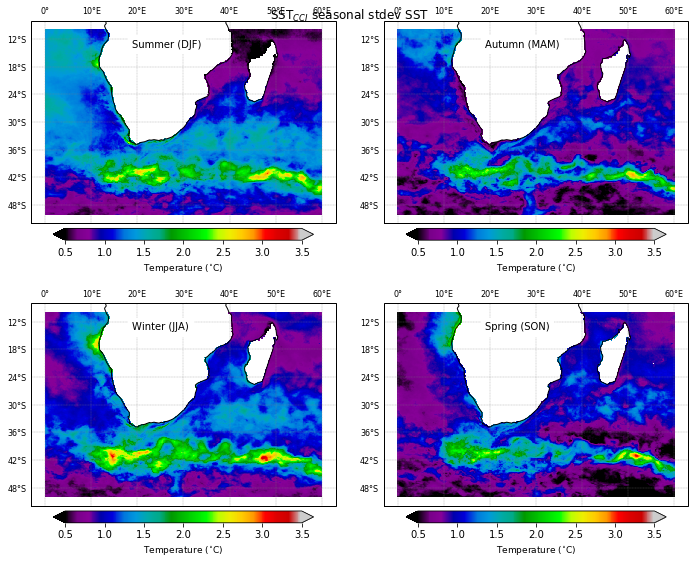

In [55]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('SST$_{CCI}$ seasonal stdev SST')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    img = ds_sst_seasonal_stdev[s,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=0.5, vmax=3.5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdev_SSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>)

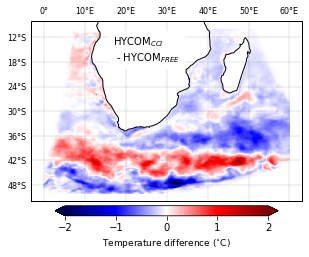

<Figure size 432x288 with 0 Axes>

In [67]:
proj = ccrs.PlateCarree()

diff = ds_cci.temperature.std('time') - ds_free.temperature.std('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - HYCOM$_{FREE}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdevdiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - HYCOM<sub>FREE</sub>) seasonal stdev SST

In [68]:
# Group data and mean by season

ds_free_seasonal_stdev = ds_free['temperature'].groupby('time.season').std('time')
ds_cci_seasonal_stdev = ds_cci['temperature'].groupby('time.season').std('time')

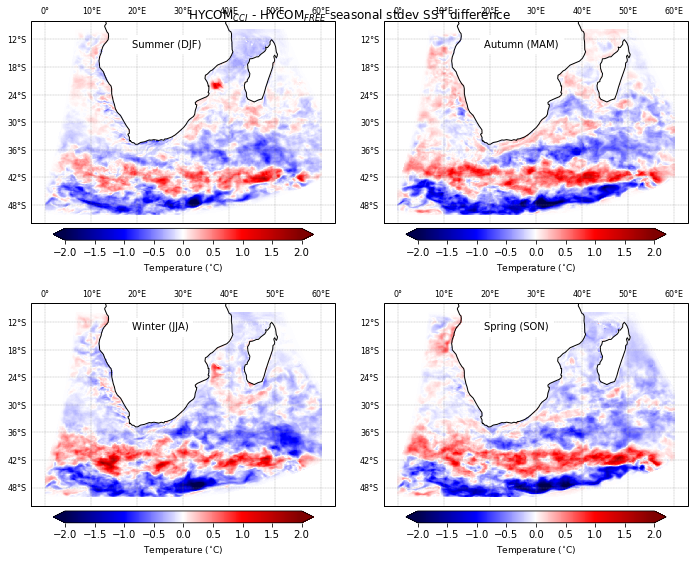

In [70]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ - HYCOM$_{FREE}$ seasonal stdev SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_seasonal_stdev[s,0,:,:] - ds_free_seasonal_stdev[s,0,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdevdiff_HYCOMcciHYCOMfree.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>FREE</sub> - CCI SST)  stdev SST

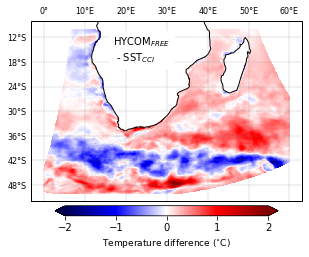

<Figure size 432x288 with 0 Axes>

In [22]:
proj = ccrs.PlateCarree()

diff = ds_free['temperature'].std('time') - ds_sst['analysed_sst'].std('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{FREE}$\n - SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdevdiff_HYCOMfreeSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - SST<sub>CCI</sub>) seasonal stdev SST

In [21]:
# Group data and mean by season

ds_sst_seasonal_stdev = ds_sst['analysed_sst'].groupby('time.season').std('time')
ds_free_seasonal_stdev = ds_free['temperature'].groupby('time.season').std('time')

/home/harry/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


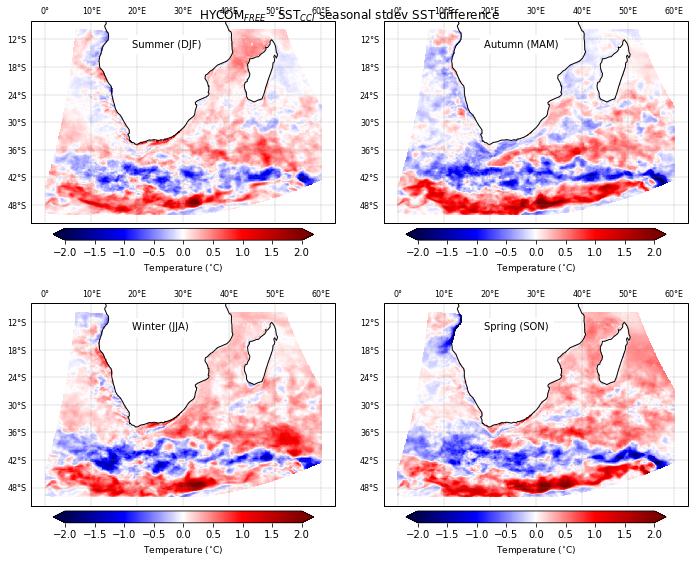

In [23]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{FREE}$ - SST$_{CCI}$ seasonal stdev SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_free_seasonal_stdev[s,0,:,:] - ds_sst_seasonal_stdev[s,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdevdiff_HYCOMfreeSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - CCI SST)  stdev SST

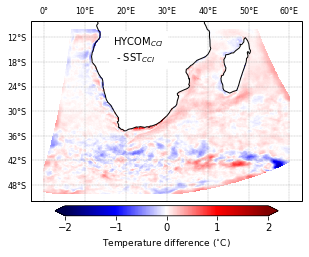

<Figure size 432x288 with 0 Axes>

In [73]:
proj = ccrs.PlateCarree()

diff = ds_cci['temperature'].std('time') - ds_sst['analysed_sst'].std('time')

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature difference ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.78,'HYCOM$_{CCI}$\n - SST$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/sst/SST_stdevdiff_HYCOMcciSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### Difference (HYCOM<sub>CCI</sub> - SST<sub>CCI</sub>) seasonal stdev SST

In [16]:
# Group data and mean by season

ds_sst_seasonal_stdev = ds_sst['analysed_sst'].groupby('time.season').std('time')
ds_cci_seasonal_stdev = ds_cci['temperature'].groupby('time.season').std('time')

/home/harry/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


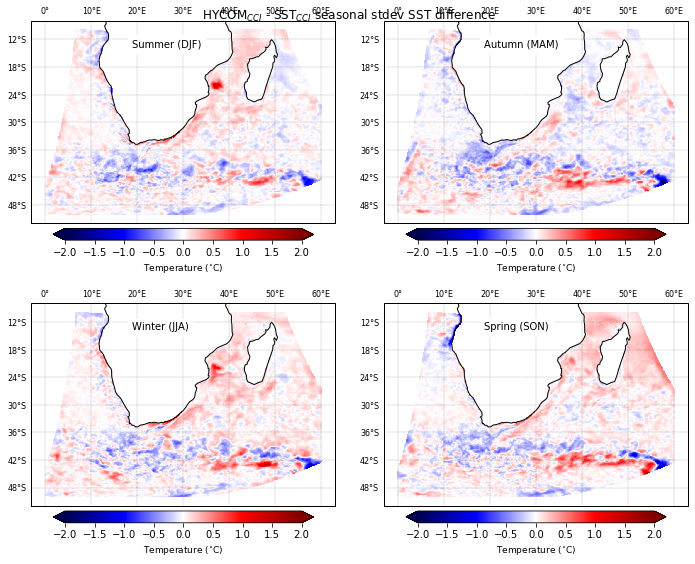

In [17]:
proj = ccrs.PlateCarree()
seasons = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

fig = plt.figure(figsize=(10,8))
fig.suptitle('HYCOM$_{CCI}$ - SST$_{CCI}$ seasonal stdev SST difference')

for s, i in enumerate(seasons):
    
    ax = plt.subplot(2,2,s+1,projection=proj)
    
    diff = ds_cci_seasonal_stdev[s,0,:,:] - ds_sst_seasonal_stdev[s,:,:]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.33,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/sst/SST_seasonalstdevdiff_HYCOMcciSSTcci.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

### =====================================================

In [4]:
# selecting max and min ACT days
max_day = '2011-09-28'
min_day = '2011-07-03'

ds_cci_max = ds_cci.sel(time=max_day).squeeze()
ds_cci_min = ds_cci.sel(time=min_day).squeeze()

ds_free_max = ds_free.sel(time=max_day).squeeze()
ds_free_min = ds_free.sel(time=min_day).squeeze()

ds_sst_max = ds_sst.sel(time=max_day).squeeze()
ds_sst_min = ds_sst.sel(time=min_day).squeeze()

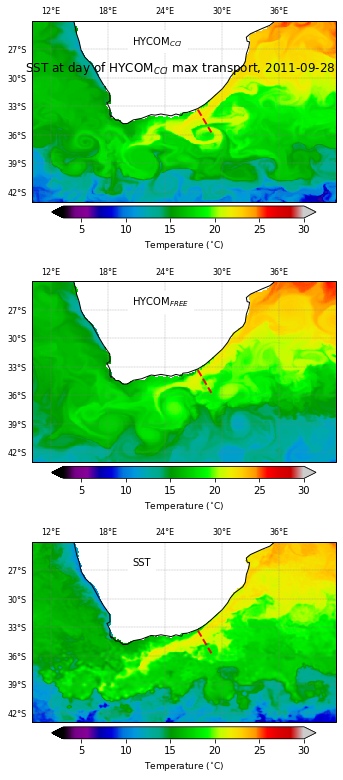

In [7]:
proj = ccrs.PlateCarree()
dataset = [ds_cci_max, ds_free_max, ds_sst_max]
ds_names = ['HYCOM$_{CCI}$','HYCOM$_{FREE}$','SST']
sst_vars = ['temperature', 'temperature', 'analysed_sst']

fig = plt.figure(figsize=(5,11))
fig.suptitle('SST at day of HYCOM$_{CCI}$ max transport, 2011-09-28', y=0.92)

for s, i in enumerate(dataset):
    
    ax = plt.subplot(3,1,s+1,projection=proj)
    ax.set_extent((10, 42, -42, -24))
    
    img = i[sst_vars[s]].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.plot([27.4808, 28.9000], [-33.3438, -35.7338], color='red', linewidth=1.9, linestyle='dashed',  transform=ccrs.Geodetic())
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    ax.text(0.33,0.87,'{0}'.format(ds_names[s]), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/act/SST_HYCOMcciMaximum.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

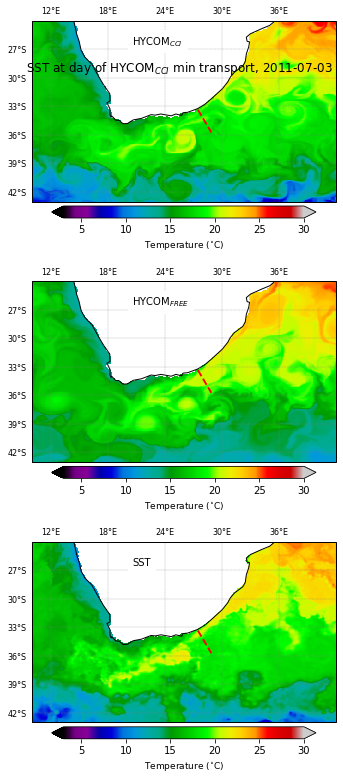

In [8]:
proj = ccrs.PlateCarree()
dataset = [ds_cci_min, ds_free_min, ds_sst_min]
ds_names = ['HYCOM$_{CCI}$','HYCOM$_{FREE}$','SST']
sst_vars = ['temperature', 'temperature', 'analysed_sst']

fig = plt.figure(figsize=(5,11))
fig.suptitle('SST at day of HYCOM$_{CCI}$ min transport, 2011-07-03', y=0.92)

for s, i in enumerate(dataset):
    
    ax = plt.subplot(3,1,s+1,projection=proj)
    ax.set_extent((10, 42, -42, -24))
    
    img = i[sst_vars[s]].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, vmin=3, vmax=30)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.plot([27.4808, 28.9000], [-33.3438, -35.7338], color='red', linewidth=1.9, linestyle='dashed',  transform=ccrs.Geodetic())
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    ax.text(0.33,0.87,'{0}'.format(ds_names[s]), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/act/SST_HYCOMcciMinimum.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()